# 概率
:label:`sec_prob`
 
簡單地說，機器學習就是做出預測。
 
根據病人的臨床病史，我們可能想預測他們在下一年心臟病發作的*概率*。
在飛機噴氣發動機的異常檢測中，我們想要評估一組發動機讀數為正常運行情況的概率有多大。
在強化學習中，我們希望智能體（agent）能在一個環境中智能地行動。
這意味著我們需要考慮在每種可行的行為下獲得高獎勵的概率。
當我們建立推薦系統時，我們也需要考慮概率。
例如，假設我們為一家大型線上書店工作，我們可能希望估計某些用戶購買特定圖書的概率。
為此，我們需要使用概率學。
有完整的課程、專業、論文、職業、甚至院系，都致力於概率學的工作。
所以很自然地，我們在這部分的目標不是教授整個科目。
相反，我們希望教給讀者基礎的概率知識，使讀者能夠開始構建第一個深度學習模型，
以便讀者可以開始自己探索它。

現在讓我們更認真地考慮第一個例子：根據照片區分貓和狗。
這聽起來可能很簡單，但對於機器卻可能是一個艱巨的挑戰。
首先，問題的難度可能取決於圖像的解析度。

![不同解析度的圖像 ($10 \times 10$, $20 \times 20$, $40 \times 40$, $80 \times 80$, 和 $160 \times 160$ pixels)](../img/cat-dog-pixels.png)
:width:`300px`
:label:`fig_cat_dog`

如 :numref:`fig_cat_dog`所示，雖然人類很容易以$160 \times 160$像素的解析度識別貓和狗，
但它在$40\times40$像素上變得具有挑戰性，而且在$10 \times 10$像素下幾乎是不可能的。
換句話說，我們在很遠的距離（從而降低解析度）區分貓和狗的能力可能會變為猜測。
概率給了我們一種正式的途徑來說明我們的確定性水平。
如果我們完全肯定圖像是一隻貓，我們說標籤$y$是"貓"的*概率*，表示為$P(y=$"貓"$)$等於$1$。
如果我們沒有證據表明$y=$"貓"或$y=$"狗"，那麼我們可以說這兩種可能性是相等的，
即$P(y=$"貓"$)=P(y=$"狗"$)=0.5$。
如果我們不十分確定圖像描繪的是一隻貓，我們可以將概率賦值為$0.5<P(y=$"貓"$)<1$。

現在考慮第二個例子：給出一些天氣監測數據，我們想預測明天北京下雨的概率。
如果是夏天，下雨的概率是0.5。

在這兩種情況下，我們都不確定結果，但這兩種情況之間有一個關鍵區別。
在第一種情況中，圖像實際上是狗或貓二選一。
在第二種情況下，結果實際上是一個隨機的事件。
因此，概率是一種靈活的語言，用於說明我們的確定程度，並且它可以有效地應用於廣泛的領域中。

## 基本概率論

假設我們擲骰子，想知道看到1的機率有多大，而不是看到另一個數字。
如果骰子是公平的，那麼所有六個結果$\{1, \ldots, 6\}$都有相同的可能發生，
因此我們可以說$1$發生的概率為$\frac{1}{6}$。

然而現實生活中，對於我們從工廠收到的真實骰子，我們需要檢查它是否有瑕疵。
檢查骰子的唯一方法是多次投擲並記錄結果。
對於每個骰子，我們將觀察到$\{1, \ldots, 6\}$中的一個值。
對於每個值，一種自然的方法是將它出現的次數除以投擲的總次數，
即此*事件*（event）概率的*估計值*。
*大數定律*（law of large numbers）告訴我們：
隨著投擲次數的增加，這個估計值會越來越接近真實的潛在概率。
讓我們用程式碼試一試！

首先，我們導入必要的軟體套件。


In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

在統計學中，我們把從概率分布中抽取樣本的過程稱為*抽樣*（sampling）。
籠統來說，可以把*分布*（distribution）看作對事件的概率分配，
稍後我們將給出的更正式定義。
將概率分配給一些離散選擇的分布稱為*多項分布*（multinomial distribution）。
 
為了抽取一個樣本，即擲骰子，我們只需傳入一個概率向量。
輸出是另一個相同長度的向量：它在索引$i$處的值是採樣結果中$i$出現的次數。


In [3]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 0., 1., 0., 0.])

在估計一個骰子的公平性時，我們希望從同一分布中生成多個樣本。
如果用Python的for迴圈來完成這個任務，速度會慢得驚人。
因此我們使用深度學習框架的函數同時抽取多個樣本，得到我們想要的任意形狀的獨立樣本陣列。


In [4]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([2., 1., 0., 0., 1., 6.])

現在我們知道如何對骰子進行採樣，我們可以模擬1000次投擲。
然後，我們可以統計1000次投擲後，每個數字被投中了多少次。
具體來說，我們計算相對頻率，以作為真實概率的估計。


In [5]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1710, 0.1690, 0.1650, 0.1620, 0.1580, 0.1750])

因為我們是從一個公平的骰子中生成的數據，我們知道每個結果都有真實的機率$\frac{1}{6}$，
大約是$0.167$，所以上面輸出的估計值看起來不錯。
 
我們也可以看到這些機率如何隨著時間的推移收斂到真實機率。
讓我們進行500組實驗，每組抽取10個樣本。


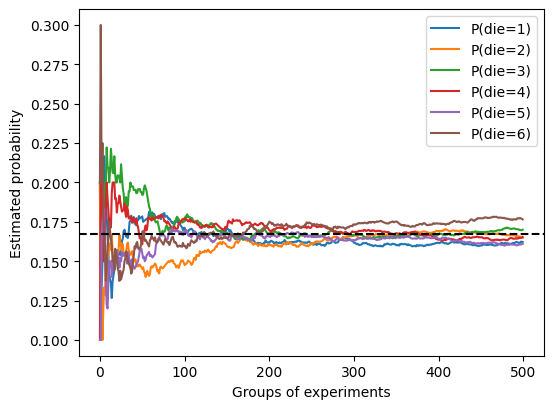

In [6]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

plt.figure(figsize=(6, 4.5))

for i in range(6):
    plt.plot(estimates[:, i].numpy(), 
             label=f'P(die={i + 1})')
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();

每條實線對應於骰子的6個值中的一個，並給出骰子在每組實驗後出現值的估計機率。
當我們通過更多的實驗獲得更多的數據時，這$6$條實體曲線向真實機率收斂。

### 機率論公理

在處理骰子擲出時，我們將集合$\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$
稱為*樣本空間*（sample space）或*結果空間*（outcome space），
其中每個元素都是*結果*（outcome）。
*事件*（event）是一組給定樣本空間的隨機結果。
例如，"看到$5$"（$\{5\}$）和"看到奇數"（$\{1, 3, 5\}$）都是擲出骰子的有效事件。
注意，如果一個隨機實驗的結果在$\mathcal{A}$中，則事件$\mathcal{A}$已經發生。
也就是說，如果投擲出$3$點，因為$3 \in \{1, 3, 5\}$，我們可以說，"看到奇數"的事件發生了。

*機率*（probability）可以被認為是將集合映射到真實值的函數。
在給定的樣本空間$\mathcal{S}$中，事件$\mathcal{A}$的機率，
表示為$P(\mathcal{A})$，滿足以下屬性：

* 對於任意事件$\mathcal{A}$，其機率從不會是負數，即$P(\mathcal{A}) \geq 0$；
* 整個樣本空間的機率為$1$，即$P(\mathcal{S}) = 1$；
* 對於*互斥*（mutually exclusive）事件（對於所有$i \neq j$都有$\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$）的任意一個可數序列$\mathcal{A}_1, \mathcal{A}_2, \ldots$，序列中任意一個事件發生的機率等於它們各自發生的機率之和，即$P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$。

以上也是機率論的公理，由科爾莫戈洛夫於1933年提出。
有了這個公理系統，我們可以避免任何關於隨機性的哲學爭論；
相反，我們可以用數學語言嚴格地推理。
例如，假設事件$\mathcal{A}_1$為整個樣本空間，
且當所有$i > 1$時的$\mathcal{A}_i = \emptyset$，
那麼我們可以證明$P(\emptyset) = 0$，即不可能發生事件的機率是$0$。
 
### 隨機變量

在我們擲骰子的隨機實驗中，我們引入了*隨機變量*（random variable）的概念。
隨機變量幾乎可以是任何數量，並且它可以在隨機實驗的一組可能性中取一個值。
考慮一個隨機變量$X$，其值在擲骰子的樣本空間$\mathcal{S}=\{1,2,3,4,5,6\}$中。
我們可以將事件"看到一個$5$"表示為$\{X=5\}$或$X=5$，
其機率表示為$P(\{X=5\})$或$P(X=5)$。
通過$P(X=a)$，我們區分了隨機變量$X$和$X$可以採取的值（例如$a$）。
然而，這可能會導致繁瑣的表示。
為了簡化符號，一方面，我們可以將$P(X)$表示為隨機變量$X$上的*分布*（distribution）：
分布告訴我們$X$獲得某一值的機率。
另一方面，我們可以簡單用$P(a)$表示隨機變量取值$a$的機率。
由於機率論中的事件是來自樣本空間的一組結果，因此我們可以為隨機變量指定值的可取範圍。
例如，$P(1 \leq X \leq 3)$表示事件$\{1 \leq X \leq 3\}$，
即$\{X = 1, 2, \text{or}, 3\}$的機率。
等價地，$P(1 \leq X \leq 3)$表示隨機變量$X$從$\{1, 2, 3\}$中取值的機率。

請注意，*離散*（discrete）隨機變量（如骰子的每一面）
和*連續*（continuous）隨機變量（如人的體重和身高）之間存在微妙的區別。
現實生活中，測量兩個人是否具有完全相同的身高沒有太大意義。
如果我們進行足夠精確的測量，最終會發現這個星球上沒有兩個人具有完全相同的身高。
在這種情況下，詢問某人的身高是否落入給定的區間，比如是否在1.79米和1.81米之間更有意義。
在這些情況下，我們將這個看到某個數值的可能性量化為*密度*（density）。
高度恰好為1.80米的機率為0，但密度不是0。
在任何兩個不同高度之間的區間，我們都有非零的機率。
在本節的其餘部分中，我們將考慮離散空間中的機率。
連續隨機變量的機率可以參考深度學習數學附錄中[隨機變量](https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/random-variables.html)
的一節。

## 處理多個隨機變量

很多時候，我們會考慮多個隨機變量。
比如，我們可能需要對疾病和症狀之間的關係進行建模。
給定一個疾病和一個症狀，比如"流感"和"咳嗽"，以某個機率存在或不存在於某個患者身上。
我們需要估計這些機率以及機率之間的關係，以便我們可以運用我們的推斷來實現更好的醫療服務。

再舉一個更複雜的例子：圖像包含數百萬像素，因此有數百萬個隨機變量。
在許多情況下，圖像會附帶一個*標籤*（label），標識圖像中的對象。
我們也可以將標籤視為一個隨機變量。
我們甚至可以將所有元數據視為隨機變量，例如位置、時間、光圈、焦距、ISO、對焦距離和相機類型。
所有這些都是聯合發生的隨機變量。
當我們處理多個隨機變量時，會有若干個變量是我們感興趣的。

### 聯合機率

第一個被稱為*聯合機率*（joint probability）$P(A=a,B=b)$。
給定任意值$a$和$b$，聯合機率可以回答：$A=a$和$B=b$同時滿足的機率是多少？
請注意，對於任何$a$和$b$的取值，$P(A = a, B=b) \leq P(A=a)$。
這點是確定的，因為要同時發生$A=a$和$B=b$，$A=a$就必須發生，$B=b$也必須發生（反之亦然）。因此，$A=a$和$B=b$同時發生的可能性不大於$A=a$或是$B=b$單獨發生的可能性。

### 條件機率

聯合機率的不等式帶給我們一個有趣的比率：
$0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$。
我們稱這個比率為*條件機率*（conditional probability），
並用$P(B=b \mid A=a)$表示它：它是$B=b$的機率，前提是$A=a$已發生。

### 貝葉斯定理

使用條件機率的定義，我們可以得出統計學中最有用的方程之一：
*Bayes定理*（Bayes' theorem）。
根據*乘法法則*（multiplication rule ）可得到$P(A, B) = P(B \mid A) P(A)$。
根據對稱性，可得到$P(A, B) = P(A \mid B) P(B)$。
假設$P(B)>0$，求解其中一個條件變量，我們得到

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

請注意，這裡我們使用緊湊的表示法：
其中$P(A, B)$是一個*聯合分布*（joint distribution），
$P(A \mid B)$是一個*條件分布*（conditional distribution）。
這種分布可以在給定值$A = a, B=b$上進行求值。

### 邊際化

為了能進行事件機率求和，我們需要*求和法則*（sum rule），
即$B$的機率相當於計算$A$的所有可能選擇，並將所有選擇的聯合機率聚合在一起：

$$P(B) = \sum_{A} P(A, B),$$

這也稱為*邊際化*（marginalization）。
邊際化結果的機率或分布稱為*邊際機率*（marginal probability）
或*邊際分布*（marginal distribution）。

### 獨立性

另一個有用屬性是*依賴*（dependence）與*獨立*（independence）。
如果兩個隨機變量$A$和$B$是獨立的，意味著事件$A$的發生跟$B$事件的發生無關。
在這種情況下，統計學家通常將這一點表述為$A \perp  B$。
根據貝葉斯定理，馬上就能同樣得到$P(A \mid B) = P(A)$。
在所有其他情況下，我們稱$A$和$B$依賴。
比如，兩次連續拋出一個骰子的事件是相互獨立的。
相比之下，燈開關的位置和房間的亮度並不是（因為可能存在燈泡壞掉、電源故障，或者開關故障）。

由於$P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$等價於$P(A, B) = P(A)P(B)$，
因此兩個隨機變量是獨立的，當且僅當兩個隨機變量的聯合分布是其各自分布的乘積。
同樣地，給定另一個隨機變量$C$時，兩個隨機變量$A$和$B$是*條件獨立的*（conditionally independent），
當且僅當$P(A, B \mid C) = P(A \mid C)P(B \mid C)$。
這個情況表示為$A \perp B \mid C$。

### 應用
:label:`subsec_probability_hiv_app`

我們實戰演練一下！
假設一個醫生對患者進行愛滋病病毒（HIV）測試。
這個測試是相當準確的，如果患者健康但測試顯示他患病，這個機率只有1%；
如果患者真正感染HIV，它永遠不會檢測不出。
我們使用$D_1$來表示診斷結果（如果陽性，則為$1$，如果陰性，則為$0$），
$H$來表示感染愛滋病病毒的狀態（如果陽性，則為$1$，如果陰性，則為$0$）。
在 :numref:`conditional_prob_D1`中列出了這樣的條件機率。

:條件機率為$P(D_1 \mid H)$

| 條件機率 | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_1 = 1 \mid H)$|            1 |         0.01 |
|$P(D_1 = 0 \mid H)$|            0 |         0.99 |
:label:`conditional_prob_D1`

請注意，每列的加和都是1（但每行的加和不是），因為條件機率需要總和為1，就像機率一樣。
讓我們計算如果測試出來呈陽性，患者感染HIV的機率，即$P(H = 1 \mid D_1 = 1)$。
顯然，這將取決於疾病有多常見，因為它會影響錯誤警報的數量。
假設人口總體是相當健康的，例如，$P(H=1) = 0.0015$。
為了應用貝葉斯定理，我們需要運用邊際化和乘法法則來確定
$$\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}
$$
因此，我們得到

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}.$$

換句話說，儘管使用了非常準確的測試，患者實際上患有愛滋病的幾率只有13.06%。
正如我們所看到的，機率可能是違反直覺的。

患者在收到這樣可怕的消息後應該怎麼辦？
很可能，患者會要求醫生進行另一次測試來確定病情。
第二個測試具有不同的特性，它不如第一個測試那麼精確，
如 :numref:`conditional_prob_D2`所示。

:條件機率為$P(D_2 \mid H)$

| 條件機率 | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_2 = 1 \mid H)$|            0.98 |         0.03 |
|$P(D_2 = 0 \mid H)$|            0.02 |         0.97 |
:label:`conditional_prob_D2`

不幸的是，第二次測試也顯示陽性。讓我們通過假設條件獨立性來計算出應用Bayes定理的必要機率：
$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 0) \\
=& P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)  \\
=& 0.0003,
\end{aligned}
$$

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 1) \\
=& P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)  \\
=& 0.98.
\end{aligned}
$$
現在我們可以應用邊際化和乘法規則：

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1) \\
=& P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
=& P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
=& 0.00176955.
\end{aligned}
$$
 
最後，鑑於存在兩次陽性檢測，患者患有愛滋病的機率為

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1, D_2 = 1)\\
=& \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)} \\
=& 0.8307.
\end{aligned}
$$

也就是說，第二次測試使我們能夠對患病的情況獲得更高的信心。
儘管第二次檢驗比第一次檢驗的準確性要低得多，但它仍然顯著提高我們的預測機率。

## 期望和方差

為了概括機率分布的關鍵特徵，我們需要一些測量方法。
一個隨機變量$X$的*期望*（expectation，或平均值（average））表示為
 
$$E[X] = \sum_{x} x P(X = x).$$
 
當函數$f(x)$的輸入是從分布$P$中抽取的隨機變量時，$f(x)$的期望值為
 
$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$
 
在許多情況下，我們希望衡量隨機變量$X$與其期望值的偏置。這可以通過方差來量化
 
$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$
 
方差的平方根被稱為*標準差*（standard deviation）。
隨機變量函數的方差衡量的是：當從該隨機變量分布中採樣不同值$x$時，
函數值偏離該函數的期望的程度：
 
$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$
 
## 小結
 
* 我們可以從機率分布中採樣。
* 我們可以使用聯合分布、條件分布、Bayes定理、邊際化和獨立性假設來分析多個隨機變量。
* 期望和方差為機率分布的關鍵特徵的概括提供了實用的度量形式。

## 練習

1. 進行$m=500$組實驗，每組抽取$n=10$個樣本。改變$m$和$n$，觀察和分析實驗結果。
2. 給定兩個機率為$P(\mathcal{A})$和$P(\mathcal{B})$的事件，計算$P(\mathcal{A} \cup \mathcal{B})$和$P(\mathcal{A} \cap \mathcal{B})$的上限和下限。（提示：使用[友元圖](https://en.wikipedia.org/wiki/Venn_diagram)來展示這些情況。)
3. 假設我們有一系列隨機變量，例如$A$、$B$和$C$，其中$B$只依賴於$A$，而$C$只依賴於$B$，能簡化聯合機率$P(A, B, C)$嗎？（提示：這是一個[馬爾可夫鏈](https://en.wikipedia.org/wiki/Markov_chain)。)
4. 在 :numref:`subsec_probability_hiv_app`中，第一個測試更準確。為什麼不運行第一個測試兩次，而是同時運行第一個和第二個測試?


[Discussions](https://discuss.d2l.ai/t/1762)


## 回答:

1. 進行$m=500$組實驗，每組抽取$n=10$個樣本。改變$m$和$n$，觀察和分析實驗結果。


---

1. **設置參數**：
   - 定義 $m$ 和 $n$ 的值，如 $m=500$ 和 $n=10$。
   - 每組從某個分佈中抽取樣本，例如均勻分佈或正態分佈。

2. **執行實驗**：
   - 使用隨機數生成器模擬 $m$ 組實驗，每組抽取 $n$ 個樣本。
   - 計算每組的樣本統計值（如平均值、標準差）。

3. **改變參數**：
   - 改變 $m$ 和 $n$ 的值，觀察樣本統計值如何變化。

4. **視覺化結果**：
   - 使用直方圖或折線圖展示統計量的分佈和變化。

---
#### **範例程式碼**：

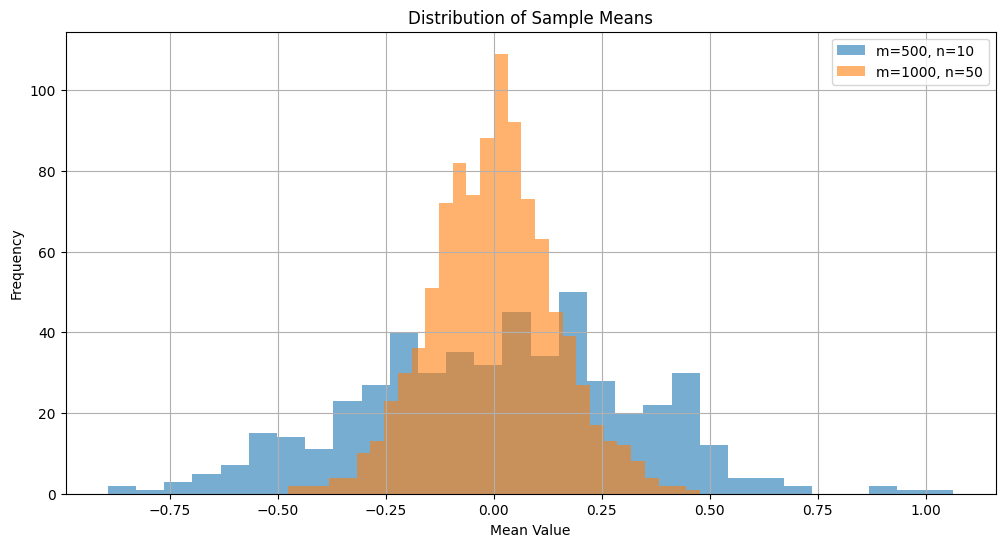

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 設置實驗參數
m = 500  # 實驗組數
n = 10   # 每組樣本數

# 從標準正態分佈中抽樣
samples = [np.random.normal(loc=0, scale=1, size=n) for _ in range(m)]

# 計算每組的平均值
means = [np.mean(sample) for sample in samples]

# 改變 n 或 m，重新計算
m2 = 1000  # 新的實驗組數
n2 = 50    # 新的樣本數
samples2 = [np.random.normal(loc=0, scale=1, size=n2) for _ in range(m2)]
means2 = [np.mean(sample) for sample in samples2]

# 繪製直方圖對比
plt.figure(figsize=(12, 6))
plt.hist(means, bins=30, alpha=0.6, label=f"m={m}, n={n}")
plt.hist(means2, bins=30, alpha=0.6, label=f"m={m2}, n={n2}")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.title("Distribution of Sample Means")
plt.legend()
plt.grid()
plt.show()

#### **觀察**：
- 樣本數（$n$）增大時，每組平均值的變異性減少（直方圖變窄）。
- 組數（$m$）增大時，樣本統計值的估計更精確，因為我們觀察到更多的數據。
---

1. **概率計算公式**：
   - $P(A \cup B) = P(A) + P(B) - P(A \cap B)$
   - $P(A \cap B)$ 的範圍為 $[0, \min(P(A), P(B))]$。
 
2. **程式碼實現**：
以下範例展示如何計算概率並繪製 Venn 圖：


P(A ∩ B) 的範圍: [0, 0.5]
P(A ∪ B) 的範圍: [0.6000000000000001, 1.1]


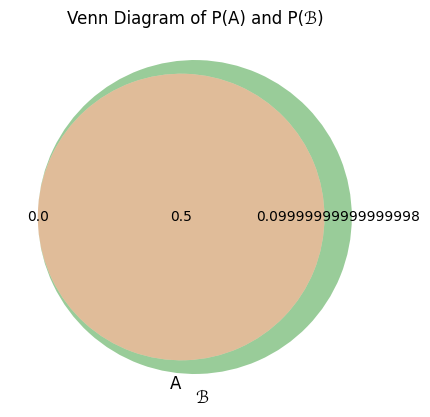

In [10]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# 假設概率
P_A = 0.5  # P(𝒜)
P_B = 0.6  # P(ℬ)

# 計算上下限
P_A_and_B_min = 0  # 最小可能交集
P_A_and_B_max = min(P_A, P_B)  # 最大可能交集

# 計算聯集概率
P_A_or_B_min = P_A + P_B - P_A_and_B_max
P_A_or_B_max = P_A + P_B - P_A_and_B_min

# 顯示結果
print(f"P(A ∩ B) 的範圍: [{P_A_and_B_min}, {P_A_and_B_max}]")
print(f"P(A ∪ B) 的範圍: [{P_A_or_B_min}, {P_A_or_B_max}]")

# 繪製 Venn 圖
venn = venn2(subsets=(P_A - P_A_and_B_max, P_B - P_A_and_B_max, P_A_and_B_max),
             set_labels=('A', 'ℬ'))
plt.title("Venn Diagram of P(A) and P(ℬ)")
plt.show()

3. **分析結果**：
- $P(A \cup B)$ 反映了兩事件至少發生一次的概率，其上下限取決於交集概率。
- $P(A \cap B)$ 的上下限範圍取決於事件獨立性或互斥性。

4. **進一步測試**：
- 更改 $P(A)$ 和 $P(B)$ 的值，觀察結果如何變化。
---

3. 假設我們有一系列隨機變量，例如$A$、$B$和$C$，其中$B$只依賴於$A$，而$C$只依賴於$B$，能簡化聯合機率$P(A, B, C)$嗎？（提示：這是一個[馬爾可夫鏈](https://en.wikipedia.org/wiki/Markov_chain)。)
---

1. **馬爾可夫鏈的特性**：
   - 馬爾可夫性意味著每個隨機變量只直接依賴於前一個變量。
    - 聯合機率$P(A, B, C)$可以使用條件獨立性簡化：
     $$
     P(A, B, C) = P(A) \cdot P(B|A) \cdot P(C|B)
     $$
   - 因為$C$不直接依賴於$A$，所以不需要計算$P(C|A)$。

2. **簡化公式的應用**：
   - 簡化後，計算聯合機率變得高效，僅需依次計算各條件概率。

3. **模擬範例**：
   - 使用隨機數生成$A$、$B$和$C$的值，並計算聯合機率。

---

### **程式碼範例**：

以下程式碼模擬了三個變量的馬爾可夫鏈：

In [12]:
import numpy as np

# 定義概率函數
def P_A():
    return np.random.rand()  # A 的概率，假設均勻分佈

def P_B_given_A(a):
    return np.random.normal(loc=a, scale=0.1)  # B 依賴於 A，假設正態分佈

def P_C_given_B(b):
    return np.random.normal(loc=b, scale=0.1)  # C 依賴於 B

# 模擬隨機變量
num_samples = 1000
A_samples = np.array([P_A() for _ in range(num_samples)])
B_samples = np.array([P_B_given_A(a) for a in A_samples])
C_samples = np.array([P_C_given_B(b) for b in B_samples])

# 聯合機率的估算
joint_prob = np.mean([
    P_A() * P_B_given_A(a) * P_C_given_B(b)
    for a, b in zip(A_samples, B_samples)
])

print(f"模擬的聯合機率 P(A, B, C): {joint_prob:.4f}")

模擬的聯合機率 P(A, B, C): 0.1654


---

### **結果分析**：

1. **聯合機率的計算**：
   - 聯合機率$P(A, B, C)$被分解為三部分，並且每部分獨立計算。
   - 這大大減少了計算複雜度。

2. **模擬與現實**：
   - 通過模擬，驗證馬爾可夫鏈分解是否與原始聯合分佈一致。
   - 如果使用更精確的分佈，可以提升結果準確性。

3. **擴展**：
   - 若引入更多變量（如$D$），公式擴展為：
   $$
   P(A, B, C, D) = P(A) \cdot P(B|A) \cdot P(C|B) \cdot P(D|C)
   $$
---

### **結論**：
使用馬爾可夫鏈特性，聯合機率可以簡化為條件機率的乘積，減少計算複雜度並提高可理解性。
---


---
4. 在 :numref:`subsec_probability_hiv_app`中，第一個測試更準確。為什麼不運行第一個測試兩次，而是同時運行第一個和第二個測試?
---
1. **分析**：
   - 第一個測試更準確，因為它有更高的敏感性（sensitivity）和特異性（specificity）。
   - 敏感性：$P(D_1 = 1 \mid H = 1)$
   - 特異性：$P(D_1 = 0 \mid H = 0)$
   - 如果只運行一次，可能會因為測試誤差而導致錯誤的診斷。
   - 同時運行兩次測試，可以通過邏輯運算（如AND閘）來提高診斷的準確性。

2. **結論**：
   - 同時運行兩次測試可以提高診斷的準確性，因為它結合了兩個測試的結果。
---